In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
file_path = input("Enter the path to the CSV file: ")
df = pd.read_csv(file_path)

Enter the path to the CSV file: /content/diabetes.csv


In [ ]:
# Display the first few rows of the dataset
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Display summary statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

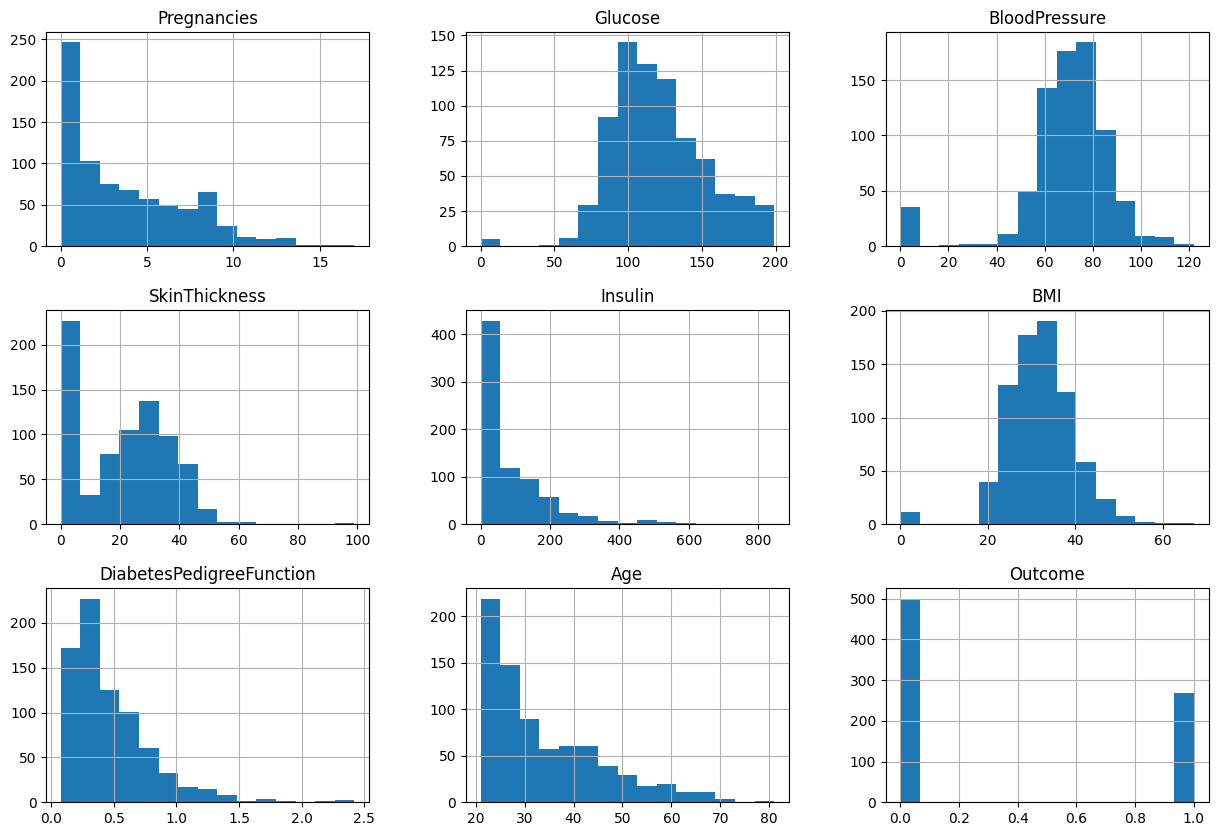

In [ ]:
# Plot histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.show()


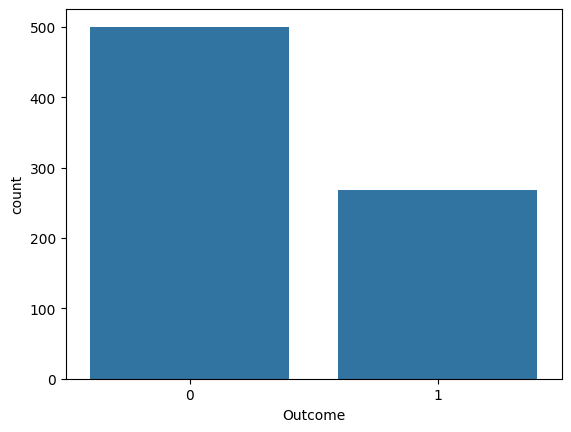

In [ ]:
# Check the distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.show()

In [ ]:
# Handle missing values (optional, depending on your data)
# For example, replacing zeros with the median for certain columns
df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True)
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)
df['BMI'].replace(0, df['BMI'].median(), inplace=True)

# Split the data into features and target variable
X = df.drop(columns='Outcome')
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


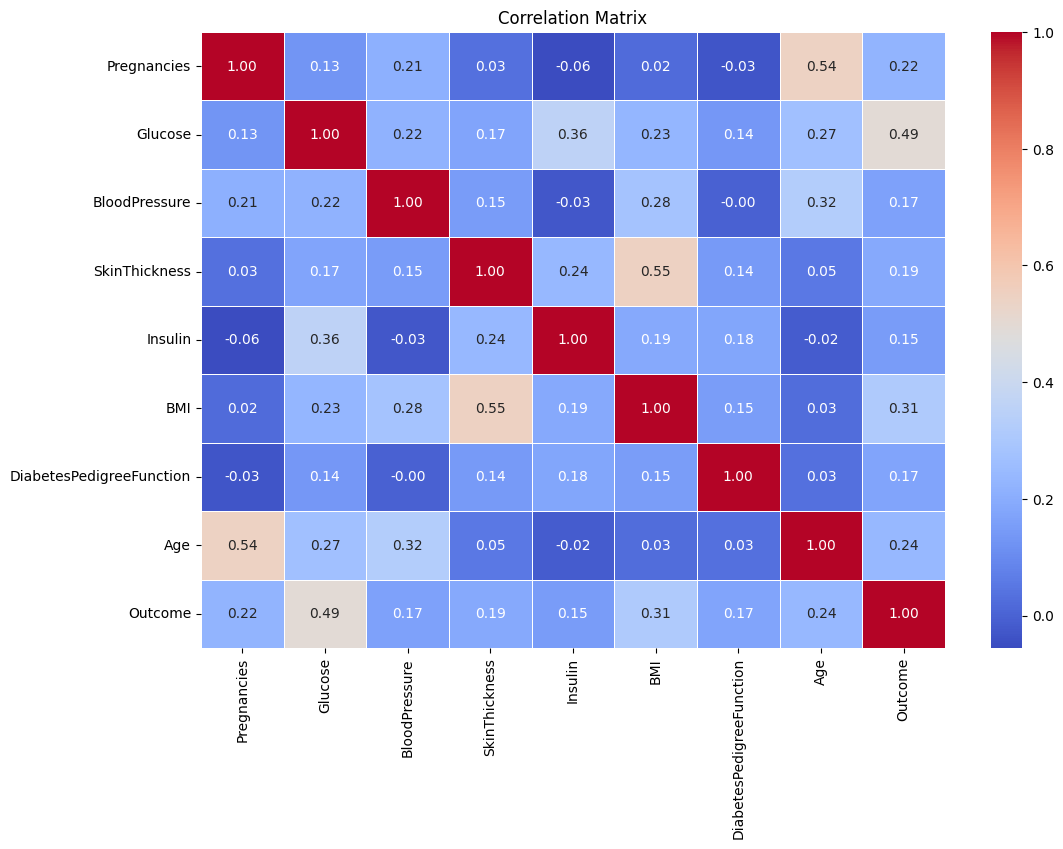

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.7662337662337663
[[82 17]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [ ]:
# Predict the outcomes on the test set
lr_predictions = lr_model.predict(X_test)


Logistic Regression Accuracy: 0.7662337662337663
Confusion Matrix:
[[82 17]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



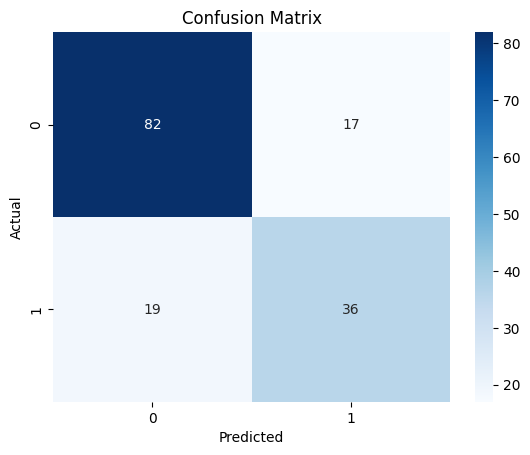

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, lr_predictions)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Note: 'elasticnet' requires the saga solver
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300]  # Number of iterations
}


In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
375 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=2)

In [ ]:
# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Best cross-validation accuracy
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Set Accuracy with Best Parameters:", test_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix with Best Parameters:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, test_predictions)
print("Classification Report with Best Parameters:")
print(class_report)


Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.7687591630014661
Test Set Accuracy with Best Parameters: 0.7792207792207793
Confusion Matrix with Best Parameters:
[[86 13]
 [21 34]]
Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

